## Datasets: https://www.kaggle.com/datasets/sansuthi/gapminder-internet

<h1>
    <a id='Back_to_Top'></a>
</h1>

## Table of content
*  [About Dataset](#About_Dataset)
*  [Libraries that I downloaded](#Libraries_that_I_downloaded)
*  [Import Libraries](#Import_Libraries)
*  [Import Dataset](#Import_Dataset)
*  [Feature Engineering](#Feature_Engineering)
*  [Data Analysis](#Data_Analysis)
    *  [Income per person](#Income_per_person)
    *  [Internet use rate](#Internet_use_rate)
    *  [Urban_Rate](#Urban_Rate)
    *  [incomeperperson VS internetuserate](#incomeperperson_VS_internetuserate)
    *  [incomeperperson VS urbanrate](#incomeperperson_VS_urbanrate)
    *  [incomeperperson-internetuserate-urbanrate](#incomeperperson_internetuserate_urbanrate)
    *  [Top 10 country with high urban rate](#Top_10_country_with_high_urban_rate)
    *  [Top 10 country with high internet user rate](#Top_10_country_with_high_internet_user_rate)
    *  [Top 10 country with high income per rate](#Top_10_country_with_high_income_per_rate)
*  [Reference](#Reference)
*  [Thank you note](#Thank_you)

<h1></h1>

<a id='About_Dataset'></a>
## About Dataset
GapMinder collects data from a handful of sources, including the Institute for Health Metrics and Evaluation, the US Census Bureau’s International Database, the United Nations Statistics Division, and the World Bank.

#### Variable Name & Description of Indicator:

* country: Unique Identifier
* incomeperperson: Gross Domestic Product per capita in constant 2000 USD. The inflation but not the differences in the cost of   living between countries has been taken into account.
* internetuserate: Internet users (per 100 people). Internet users are people with access to the worldwide network.
* urbanrate: Urban population (% of total) Urban population refers to people living in urban areas as defined by national statistical offices (calculated using World Bank population estimates and urban ratios from the United Nations World Urbanization Prospects)

<h1></h1>

<a id='Libraries_that_I_downloaded'></a>
## Libraries that I downloaded

!pip install pycountry # used to get the country code for the country
!pip install plotly # used to plotting

<h1></h1>

<a id='Import_Libraries'></a>
## Import Libraries


In [41]:
import pandas as pd
import numpy as np

from scipy.stats import norm
import statistics

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pycountry

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

<h1></h1>

<a id='Import_Dataset'></a>
## Import Dataset


In [13]:
df = pd.read_csv('gapminder_internet.csv')
df.head()

,country,incomeperperson,internetuserate,urbanrate
0,Afghanistan,NaN,3.654122,24.04
1,Albania,1914.996551,44.989947,46.72
2,Algeria,2231.993335,12.500073,65.22
3,Andorra,21943.339900,81.000000,88.92
4,Angola,1381.004268,9.999954,56.70


<h1></h1>

<a id='Feature_Engineering'></a>
## Feature Engineering


#### We are going to add new column called countrycode because it will be usefull for the plot of our worldmap

In [14]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Rep.', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czech Rep.', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Faeroe Islands', 'Fiji', 'Finland', 'France', 'French Polynesia',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', '

In [15]:
countries_dict = {}
for country in pycountry.countries:
    countries_dict[country.name] = country.alpha_3

print(countries_dict)

{'Aruba': 'ABW', 'Afghanistan': 'AFG', 'Angola': 'AGO', 'Anguilla': 'AIA', 'Åland Islands': 'ALA', 'Albania': 'ALB', 'Andorra': 'AND', 'United Arab Emirates': 'ARE', 'Argentina': 'ARG', 'Armenia': 'ARM', 'American Samoa': 'ASM', 'Antarctica': 'ATA', 'French Southern Territories': 'ATF', 'Antigua and Barbuda': 'ATG', 'Australia': 'AUS', 'Austria': 'AUT', 'Azerbaijan': 'AZE', 'Burundi': 'BDI', 'Belgium': 'BEL', 'Benin': 'BEN', 'Bonaire, Sint Eustatius and Saba': 'BES', 'Burkina Faso': 'BFA', 'Bangladesh': 'BGD', 'Bulgaria': 'BGR', 'Bahrain': 'BHR', 'Bahamas': 'BHS', 'Bosnia and Herzegovina': 'BIH', 'Saint Barthélemy': 'BLM', 'Belarus': 'BLR', 'Belize': 'BLZ', 'Bermuda': 'BMU', 'Bolivia, Plurinational State of': 'BOL', 'Brazil': 'BRA', 'Barbados': 'BRB', 'Brunei Darussalam': 'BRN', 'Bhutan': 'BTN', 'Bouvet Island': 'BVT', 'Botswana': 'BWA', 'Central African Republic': 'CAF', 'Canada': 'CAN', 'Cocos (Keeling) Islands': 'CCK', 'Switzerland': 'CHE', 'Chile': 'CHL', 'China': 'CHN', "Côte d'Iv

In [16]:
df['countrycode'] = df['country']
df.head()

,country,incomeperperson,internetuserate,urbanrate,countrycode
0,Afghanistan,NaN,3.654122,24.04,Afghanistan
1,Albania,1914.996551,44.989947,46.72,Albania
2,Algeria,2231.993335,12.500073,65.22,Algeria
3,Andorra,21943.339900,81.000000,88.92,Andorra
4,Angola,1381.004268,9.999954,56.70,Angola


In [17]:
df['countrycode'] = df['countrycode'].apply(lambda x: countries_dict[x] if x in countries_dict else 'Not found' )

In [18]:
df.head()

,country,incomeperperson,internetuserate,urbanrate,countrycode
0,Afghanistan,NaN,3.654122,24.04,AFG
1,Albania,1914.996551,44.989947,46.72,ALB
2,Algeria,2231.993335,12.500073,65.22,DZA
3,Andorra,21943.339900,81.000000,88.92,AND
4,Angola,1381.004268,9.999954,56.70,AGO


In [19]:
# check Not found in countrycode
df[df['countrycode'] =='Not found']

,country,incomeperperson,internetuserate,urbanrate,countrycode
22,Bolivia,1232.794137,20.001710,65.58,Not found
26,Brunei,17092.460000,49.989975,74.82,Not found
33,Cape Verde,1959.844472,29.999940,59.62,Not found
35,Central African Rep.,239.518749,2.300027,38.58,Not found
41,"Congo, Dem. Rep.",103.775857,0.720009,33.96,Not found
42,"Congo, Rep.",1253.292015,4.999875,61.34,Not found
45,Cote d'Ivoire,591.067944,2.599974,48.78,Not found
49,Czech Rep.,7381.312751,68.638133,73.50,Not found
53,Dominican Rep.,4049.169629,39.531274,69.02,Not found
61,Faeroe Islands,NaN,75.200000,41.42,Not found


#### Since every data is important to me to I will find the country code for each country name

In [20]:
df['countrycode'] = ['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT',
                    'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 
                    'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 
                    'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 
                    'COM', 'COD', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 
                    'CUB', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 
                    'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FRO', 'FJI', 'FIN', 'FRA', 'PYF', 
                    'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GUM', 
                    'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 
                    'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 
                    'KEN', 'KIR', 'PRK', 'KOR', 'KWT', 'KGZ', 'LAO', 
                    'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 
                    'MKD', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MTQ', 'MRT', 
                    'MUS', 'MEX', 'FSM', 'MDA', 'MCO', 'MNG', 'MNE', 'MAR', 'MOZ', 
                    'MMR', 'NAM', 'NRU', 'NPL', 'NLD', 'ANT', 'NCL', 'NZL', 'NIC', 'NER', 
                    'NGA', 'NIU', 'NOR', 'OMN', 'PAK', 'PLW', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 
                    'POL', 'PRT', 'PRI', 'QAT', 'REU', 'ROU', 'RUS', 'RWA', 
                    'KNA', 'LCA', 'VCT', 'WSM', 'SMR', 'STP', 'SAU', 'SEN', 'SRB', 'SCG', 
                    'SYC', 'SLE', 'SGP', 'SVK', 'SVN', 'SLB', 'SOM', 'ZAF', 'ESP', 'LKA', 
                    'SDN', 'SUR', 'SWZ', 'SWE', 'CHE', 'SYR', 'TWN', 
                    'TJK', 'TZA', 'THA', 'TLS', 'TGO', 'TON', 'TTO', 'TUN', 'TUR', 'TKM', 
                    'TUV', 'UGA', 'UKR', 'ARE', 'GBR', 'USA', 'URY', 'UZB', 'VUT', 'VEN', 
                    'VNM', 'PSE', 'YEM', 'ZMB', 'ZWE']

In [21]:
df

,country,incomeperperson,internetuserate,urbanrate,countrycode
0,Afghanistan,NaN,3.654122,24.04,AFG
1,Albania,1914.996551,44.989947,46.72,ALB
2,Algeria,2231.993335,12.500073,65.22,DZA
3,Andorra,21943.339900,81.000000,88.92,AND
4,Angola,1381.004268,9.999954,56.70,AGO
...,...,...,...,...,...
208,Vietnam,722.807559,27.851822,27.84,VNM
209,West Bank and Gaza,NaN,36.422772,71.90,PSE
210,"Yemen, Rep.",610.357367,12.349750,30.64,YEM
211,Zambia,432.226337,10.124986,35.42,ZMB


<h1></h1>

<a id='Data_Analysis'></a>
## Data Analysis


<a id='Income_per_person'></a>
###  Income per person


In [36]:
df['incomeperperson'].describe()

count       190.000000
mean       8740.966076
std       14262.809083
min         103.775857
25%         748.245151
50%        2553.496056
75%        9379.891166
max      105147.437700
Name: incomeperperson, dtype: float64

#### 50% of the people in the world live under $2553 per year

<AxesSubplot:title={'center':'Density Plot of Income Per Person'}, xlabel='Income Per Person', ylabel='Density'>

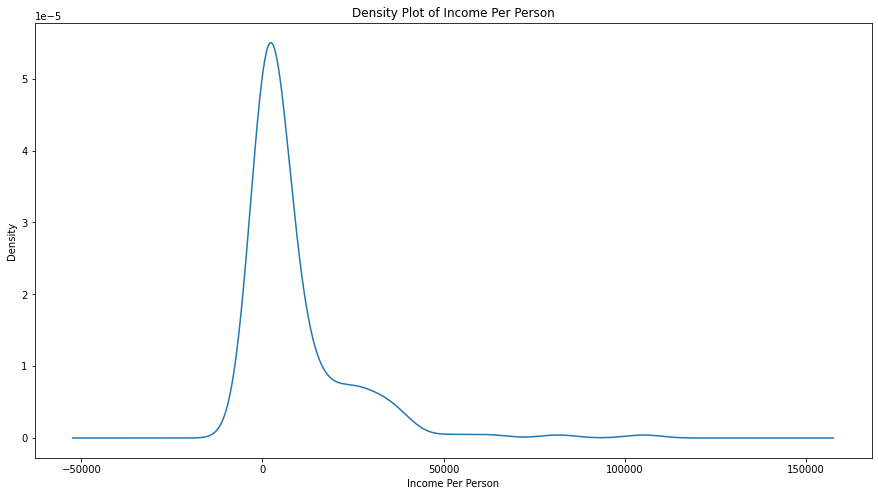

In [51]:
plt.figure(figsize=(15,8))
plt.title("Density Plot of Income Per Person") 
plt.xlabel("Income Per Person")
x_axis = pd.Series(df['incomeperperson'].dropna())

x_axis.plot.kde()

In [24]:
px.choropleth(df,locations='countrycode',color='incomeperperson',scope='world',
                    range_color=((100, 10000)),title='Income per person',height=1000)


<a id='Internet_use_rate'></a>
### Internet use rate


In [53]:
df['internetuserate'].describe()

count    192.000000
mean      35.632716
std       27.780285
min        0.210066
25%        9.999604
50%       31.810121
75%       56.416046
max       95.638113
Name: internetuserate, dtype: float64

<AxesSubplot:title={'center':'Density Plot of Internet users (per 100 people)'}, xlabel='Internet users (per 100 people)', ylabel='Density'>

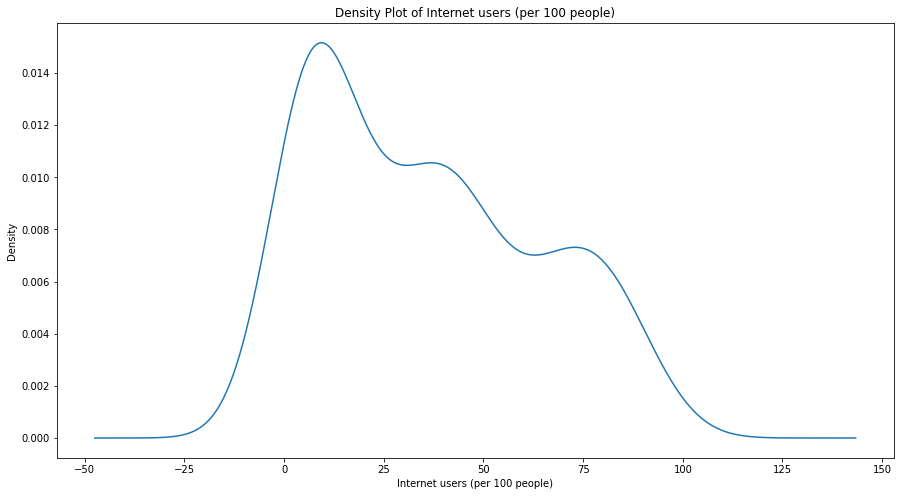

In [57]:
plt.figure(figsize=(15,8))
plt.title("Density Plot of Internet users (per 100 people)") 
plt.xlabel("Internet users (per 100 people)")
x_axis = pd.Series(df['internetuserate'].dropna())

x_axis.plot.kde()

In [55]:
px.choropleth(df,locations='countrycode',color='internetuserate',scope='world',
                    range_color=((0, 100)),title='Internet users (per 100 people)',height=1000)

<a id='Urban_Rate'></a>
### Urban Rate


In [56]:
df['urbanrate'].describe()

count    203.000000
mean      56.769360
std       23.844933
min       10.400000
25%       36.830000
50%       57.940000
75%       74.210000
max      100.000000
Name: urbanrate, dtype: float64

<AxesSubplot:title={'center':'Density Plot of Urban population (% of total)'}, xlabel='Urban population (% of total)', ylabel='Density'>

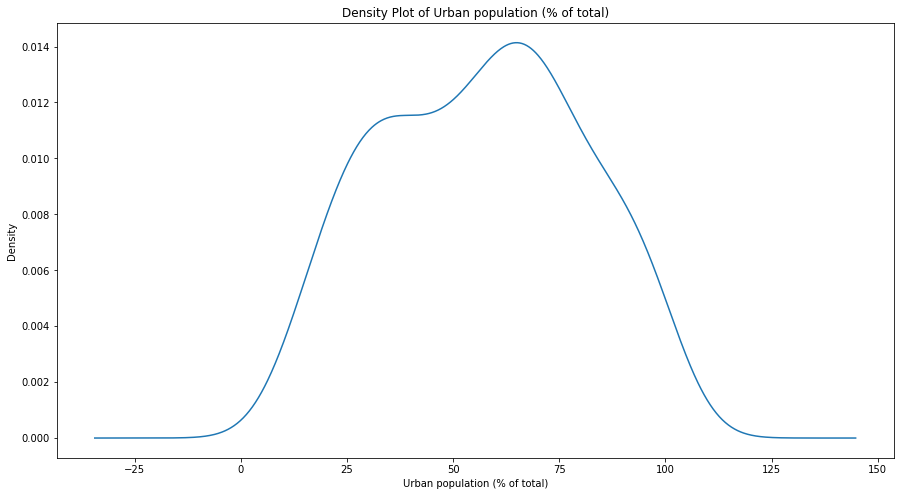

In [58]:
plt.figure(figsize=(15,8))
plt.title("Density Plot of Urban population (% of total)") 
plt.xlabel("Urban population (% of total)")
x_axis = pd.Series(df['urbanrate'].dropna())

x_axis.plot.kde()

In [59]:
px.choropleth(df,locations='countrycode',color='urbanrate',scope='world',
                    range_color=((0, 100)),title='Urban population (% of total)',height=1000)

<a id='incomeperperson_VS_internetuserate'></a>
### incomeperperson VS internetuserate


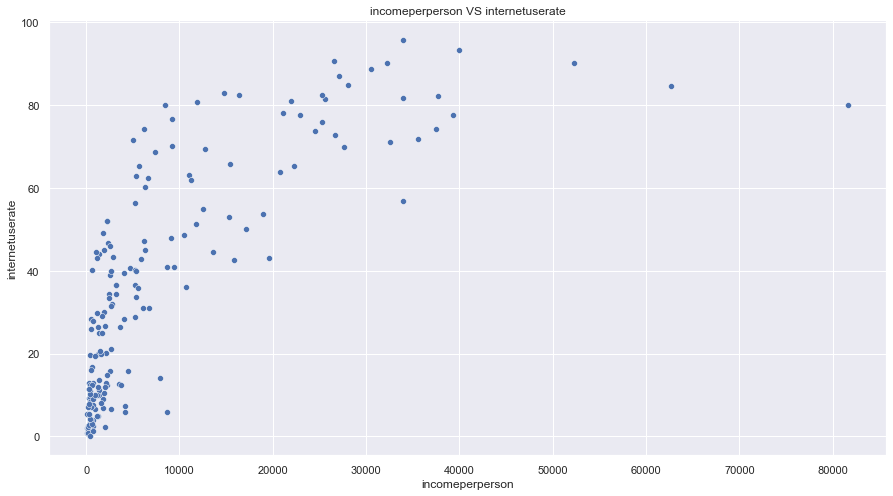

In [62]:
plt.figure(figsize=(15,8))
plt.title("incomeperperson VS internetuserate") 
sns.set_theme(style="darkgrid")
ax = sns.scatterplot(x="incomeperperson", y="internetuserate", data=df)

#### Countries with high income per person  increase the Percentage of having an internet access

<a id='incomeperperson_VS_urbanrate'></a>
### incomeperperson VS urbanrate


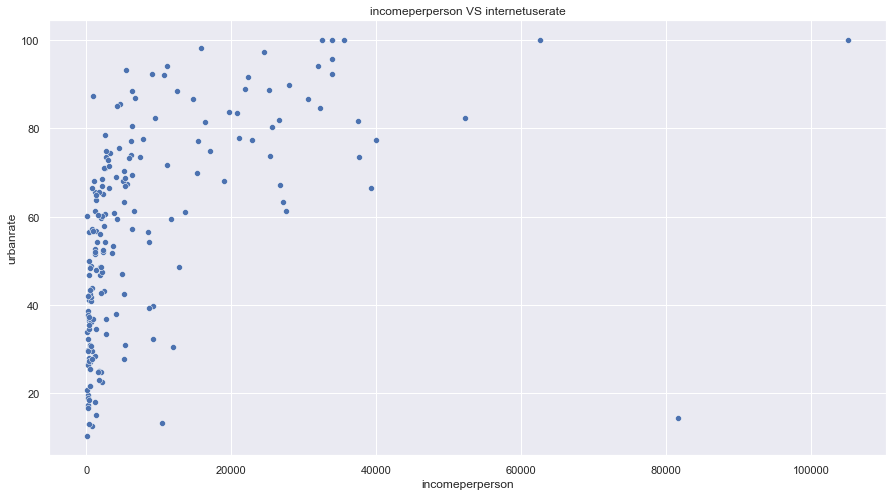

In [64]:
plt.figure(figsize=(15,8))
plt.title("incomeperperson VS internetuserate") 
sns.set_theme(style="darkgrid")
ax = sns.scatterplot(x="incomeperperson", y="urbanrate", data=df)

#### Countries with high income per person increase the Percentage of being able to live in urban

<a id='incomeperperson_internetuserate_urbanrate'></a>
### incomeperperson - internetuserate - urbanrate


<AxesSubplot:xlabel='urbanrate', ylabel='internetuserate'>

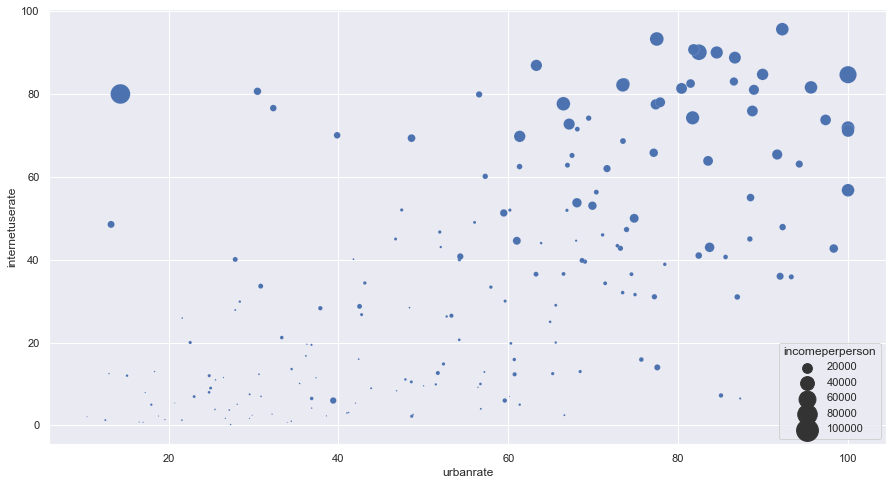

In [65]:
plt.figure(figsize = (15,8))
sns.scatterplot(x='urbanrate', y='internetuserate', size='incomeperperson', alpha=1, data=df,sizes=(1,500))

#### This plot states that country with high no of rich people are more to the Top right of the plot which states that they live mostly in urban and also have more excess to internet

<a id='Top_10_country_with_high_urban_rate'></a>
### Top 10 country with high urban rate


In [77]:
df[['country','urbanrate']][df['urbanrate'] >=90].sort_values(by=["urbanrate"], ascending=False).head(10) 

,country,urbanrate
112,"Macao, China",100.00
20,Bermuda,100.00
34,Cayman Islands,100.00
173,Singapore,100.00
83,"Hong Kong, China",100.00
127,Monaco,100.00
101,Kuwait,98.36
155,Puerto Rico,98.32
17,Belgium,97.36
156,Qatar,95.64


<a id='Top_10_country_with_high_internet_user_rate'></a>
### Top 10 country with high internet user rate


In [80]:
df[['country','internetuserate']][df['internetuserate'] >=60].sort_values(by=["internetuserate"], ascending=False).head(10) 

,country,internetuserate
85,Iceland,95.638113
144,Norway,93.277508
136,Netherlands,90.703555
111,Luxembourg,90.079527
184,Sweden,90.016190
50,Denmark,88.770254
63,Finland,86.898845
202,United Kingdom,84.731705
20,Bermuda,84.654514
139,New Zealand,83.002584


<a id='Top_10_country_with_high_income_per_rate'></a>
### Top 10 country with high Income per person


In [81]:
df[['country','incomeperperson']][df['incomeperperson'] >=6000].sort_values(by=["incomeperperson"], ascending=False).head(10) 

,country,incomeperperson
127,Monaco,105147.43770
109,Liechtenstein,81647.10003
20,Bermuda,62682.14701
111,Luxembourg,52301.58718
144,Norway,39972.35277
94,Japan,39309.47886
185,Switzerland,37662.75125
203,United States,37491.17952
83,"Hong Kong, China",35536.07247
85,Iceland,33945.31442


<h1></h1>

<a id='Reference'></a>
## Reference 


*  https://www.kaggle.com/datasets/sansuthi/gapminder-internet
*  https://www.kaggle.com/code/sasakitetsuya/what-is-the-digital-divide

<h1></h1>

<a id='Thank_you'></a>
# Thank You........😊
## Please 👍 and 💬 If you like my Analysis

### -------------------------------- 🔝  [Back to Top](#Back_to_Top)  🔝 -----------------------------------